# Ecoder Decoder Model Sample

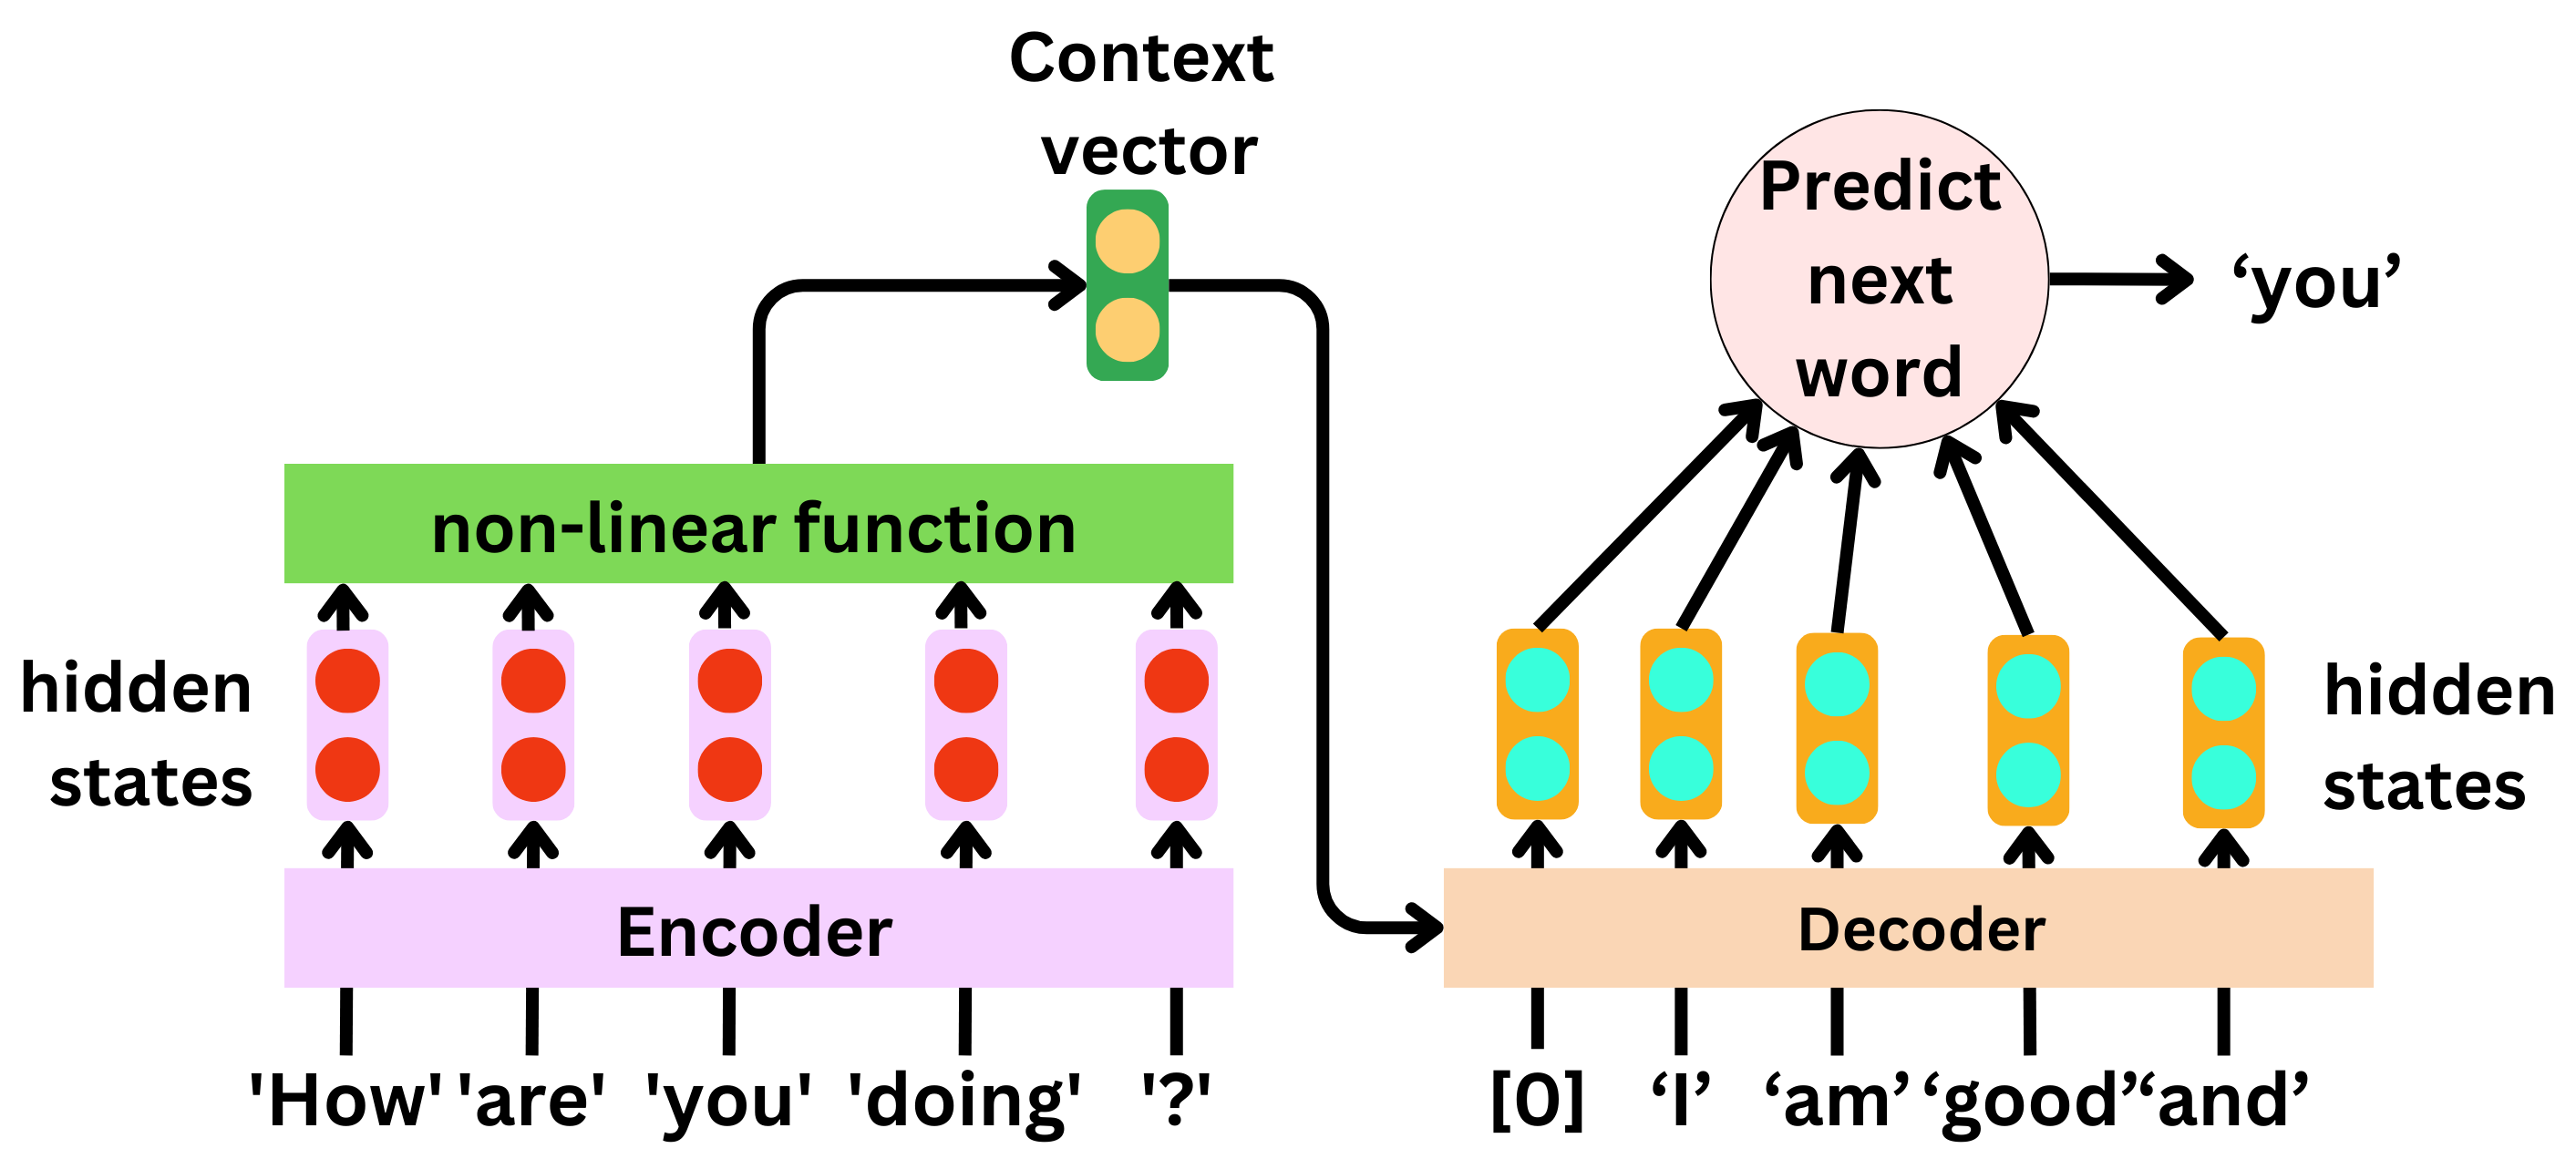

## Encoder-Decoder Architecture in RNNs:¶

* Architecture:

  Comprises two RNNs: an Encoder and a Decoder.

  Encoder processes the input sequence and converts it into a fixed-size context vector.

  Decoder takes this context vector and generates the output sequence step by step.

* Encoder:

  Takes input sequence one token at a time.

  Outputs a context vector summarizing the input sequence.

  Can use various RNN variants like LSTM or GRU.

* Decoder:

  Takes the context vector from the Encoder and generates the output sequence.

  Processes the output sequence step by step, incorporating information from the context vector.

  Can have a different architecture from the Encoder, but typically uses the same RNN variant.

* Training:

  During training, both Encoder and Decoder are jointly trained using teacher forcing.

  Teacher forcing involves providing the correct previous target token as input to the Decoder at each step.

* Inference:

  During inference, the Encoder processes the input sequence to obtain the context vector.

  The Decoder generates the output sequence one token at a time based on the context vector and previously generated tokens.


# Steps (Preprocessing -> Model Creation)

Certainly! Here are the steps for English to Hindi conversion using encoder-decoder in RNN:

1. Data Collection:

* Gather parallel text data consisting of English sentences paired with their corresponding Hindi translations. Sources can include translated literature, bilingual websites, language corpora, or user-generated content.

2. Data Preprocessing:

* Text Cleaning:
  * Remove noise such as special characters, punctuation, HTML tags, and URLs from both English and Hindi text data.

* Tokenization:
  * Split the text into individual words or tokens for both English and Hindi sentences.

* Lowercasing:
  * Convert all text to lowercase for both languages to ensure consistency.

* Handling Special Characters:
  * Handle special characters unique to Hindi script, such as consonant-vowel combinations.

* Padding:
  * Ensure that all sequences have the same length by padding shorter sequences with a special token.
3. Feature Extraction:

* Word Embeddings:
  * Convert words in both English and Hindi sentences into dense vector representations using pre-trained word embeddings like Word2Vec or GloVe.

* Sequence Representation:
  * Represent each sequence of words in both English and Hindi sentences as numerical vectors.

4. Model Architecture:

* Encoder-Decoder Architecture:
  * Implement an encoder-decoder architecture using Recurrent Neural Networks (RNNs) or Long Short-Term Memory (LSTM) networks.

  * The encoder processes the input English sentence and encodes its meaning into a fixed-length context vector.

  * The decoder then uses this context vector to generate the corresponding Hindi translation word by word.

5. Training the Model:

* Data Splitting:
  * Split the parallel text data into training, validation, and test sets.
* Loss Function:
  * Define a suitable loss function such as categorical cross-entropy to measure the difference between the predicted and actual Hindi translations.
* Optimizer:
  * Select an optimizer like Adam or RMSprop to minimize the loss during training.
* Training:
  * Train the encoder-decoder model on the training data, adjusting the model's parameters to minimize the loss on the validation set.

6. Model Evaluation:

* Performance Metrics:
  * Evaluate the model's performance on the test set using metrics such as BLEU score, accuracy, or perplexity.
  * BLEU score measures the similarity between the predicted and reference Hindi translations.

7. Inference:

* Prediction:
  * Use the trained encoder-decoder model to translate English sentences into Hindi by feeding them through the encoder and decoding the output using the decoder.
8. Post-Processing:

* Decoding:
  * Decode the numerical representations of Hindi words back into their textual form.
* Visualization:
  * Visualize the translated Hindi sentences alongside their original English counterparts for inspection and validation.

9. Model Fine-Tuning (Optional):

  * Fine-tune the encoder-decoder model based on feedback or additional data to improve translation accuracy.

10. Deployment:

* Deploy the trained English to Hindi translation model for use in applications requiring real-time or batch translation services.

11. Monitoring and Maintenance:

* Monitor the model's performance in production and update it as needed to adapt to changing language patterns or requirements.

# French To Lingala (LSTM || Encoder Decoder)

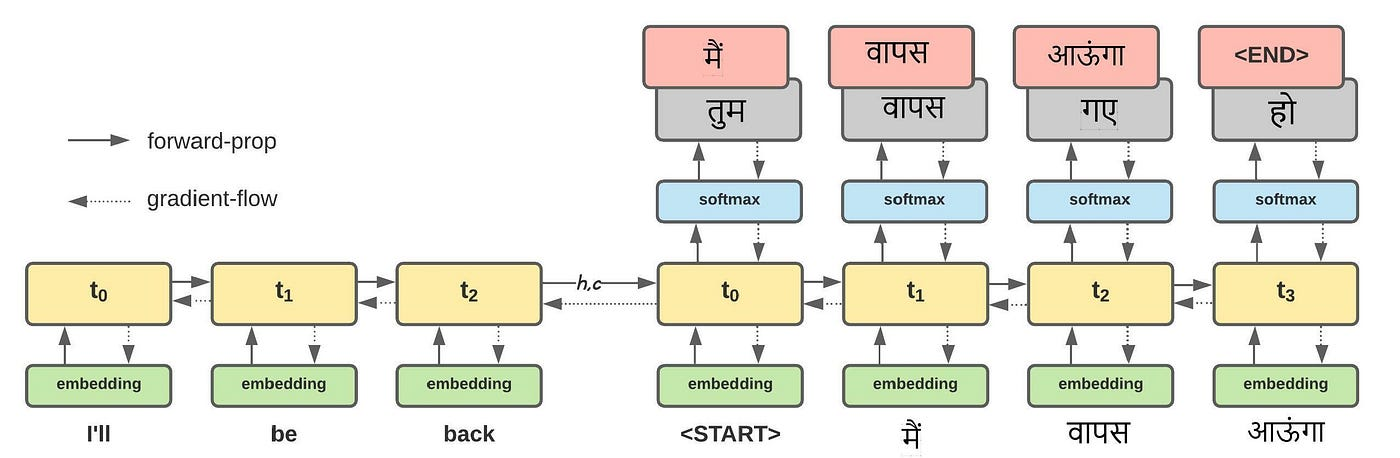

# Seq2Seq

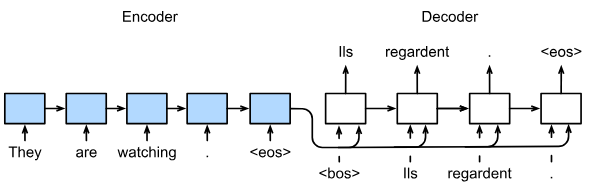

## Sequence-to-Sequence (seq2seq) Models:¶

* Objective:

  * Designed for tasks involving variable-length input and output sequences.

  * Examples include machine translation, text summarization, and question answering.

* Input-Output Mapping:

  * Maps an input sequence to an output sequence.

  * Both input and output sequences can have varying lengths.

* Flexibility:

  * Allows handling tasks where the length of the input sequence is different from the length of the output sequence.

* Encoder-Decoder Paradigm:

  * seq2seq models typically employ an Encoder-Decoder architecture.

  * Encoder processes the input sequence, capturing its meaning.

  * Decoder generates the output sequence based on the context provided by the Encoder.

* Applications:

  * Used in various natural language processing tasks such as machine translation, text summarization, and dialogue generation.

  * Also applicable in tasks like time series prediction and speech recognition.

* Attention Mechanism:

  * Often enhanced with attention mechanisms to improve performance.

  * Attention allows the model to focus on different parts of the input sequence dynamically while generating the output sequence.

* Training:

  * Trained end-to-end using backpropagation with teacher forcing during training.

  * Parameters are optimized to minimize a suitable loss function such as cross-entropy loss.

* Evaluation:

  * Evaluated based on metrics specific to the task, such as BLEU score for machine translation or ROUGE score for text summarization.


# Importing Libraries

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 15.2 MB/s eta 0:00:00


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import indian
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import unicodedata
from keras.models import Sequential,Model
from keras.layers import Input,Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import spacy
import contractions
from nltk.corpus import stopwords
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Reading the Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/fichier_sans_lignes_vides.csv')

# French-Ling Sample Data

In [ ]:
data.sample(5)

,Français,Lingala
26600,Jésus répondit: N'y a-t-il pas douze heures au...,"Yesu azongisaki : — Boni, moyi ezalaka na bang..."
26542,Ils lui répondirent: Tu es né tout entier dans...,Bazongiselaki ye : — Ndenge nini yo moto oyo o...
28721,"Mais maintenant il y a plusieurs membres, et u...","Solo, biteni ezali ebele, kasi nzoto ezali kak..."
8717,"O roi, Arauna donne le tout au roi. Et Arauna ...","Oh mokonzi, napesi yo nyonso ! Orina alobaki l..."
16956,Commencer une querelle c'est ouvrir un passage...,Kobanda koswana ezali lokola kofungola nzela y...


# Data Preprocessing
* Null Value Checking and Removing

In [ ]:
data.isnull().sum()

Français    72
Lingala      0
dtype: int64

In [ ]:
data.dropna(inplace = True )

* LOWERCASING

In [ ]:
data['Français'] = data['Français'].str.lower()

* Removing HTML Tags

In [ ]:
def remove_html(text):
    if isinstance(text,str):

        pattern = re.compile('<.*?>')
        return pattern.sub(r'',text)
    else:
        return text

data['Français'] = data['Français'].apply(remove_html)
data['Lingala'] = data['Lingala'].apply(remove_html)

* Removing URL's

In [ ]:
def remove_url(text):
    if isinstance(text,str):
        pattern = re.compile(r'https?://\S+|www\.\S+')
        return pattern.sub(r'',text)
    else:
        return
data['Français'] = data['Français'].apply(remove_url)
data['Lingala'] = data['Lingala'].apply(remove_url)

* Remove NonAlphanumeric characters

In [ ]:
# def preprocess_text(text, language='french'):
#     if not isinstance(text, str):
#         return text

#     if language == 'french':
#         pattern = re.compile(r'[^a-zA-Z0-9\s]')
#         return pattern.sub(r'', text)
#     elif language == 'lingala':
#         pattern = re.compile(r'[^\u0900-\u097F\s]')
#         return pattern.sub(r'', text)
#     else:
#         raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")

# data['Français'] = data['Français'].apply(lambda x: preprocess_text(x, language='english'))
# data['Lingala'] = data['Lingala'].apply(lambda x: preprocess_text(x, language='hindi'))

def preprocess_text(text, language='french'):
    if not isinstance(text, str):
        return text

    if language == 'french':
        pattern = r'[^a-zA-Z0-9\s]'
    elif language == 'lingala':
        pattern = r'[^\u0900-\u097F\s]'
    else:
        raise ValueError("Unsupported Language, Supported languages are 'french' and 'lingala'")

    return pd.Series(text).str.replace(pattern, '', regex=True).tolist()

data['Français'] = preprocess_text(data['Français'], language='french')
data['Lingala'] = preprocess_text(data['Lingala'], language='lingala')

* Removing Punctuations

In [ ]:
#English Punctuations...........
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def get_hindi_punctuations():
    hindi_punctuations = []
    for i in range(0x2000, 0x206f + 1):
        char = chr(i)
        if unicodedata.category(char) == 'Po':
            hindi_punctuations.append(char)
    return ''.join(hindi_punctuations)

# Get Hindi punctuation characters
hindi_punctuation = get_hindi_punctuations()

# Print Hindi punctuation characters
print('Hindi Punctuation: ', hindi_punctuation)

Hindi Punctuation:  ‖‗†‡•‣․‥…‧‰‱′″‴‵‶‷‸※‼‽‾⁁⁂⁃⁇⁈⁉⁊⁋⁌⁍⁎⁏⁐⁑⁓⁕⁖⁗⁘⁙⁚⁛⁜⁝⁞


In [ ]:
# def remove_punctuation(text, language = 'French'):
#     if language == 'French':
#         exclude_english = set(string.punctuation)
#         return ''.join(char for char in text if char not in exclude_english)
#     elif language == 'Lingala':
#         return ''.join(char for char in text if char not in hindi_punctuation)

#     else:
#         raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")


# data['Français'] = data['Français'].apply(lambda x: remove_punctuation(x,language = 'Français'))
# data['Lingala'] = data['Lingala'].apply(lambda x: remove_punctuation(x,language = 'Lingala'))

import string

def remove_punctuation(text, language = 'French'):
    if language == 'French':
        exclude = set(string.punctuation)
        return ''.join(char for char in text if char not in exclude)
    elif language == 'Lingala':
        # Define the set of Lingala punctuation characters here
        lingala_punctuation = set([...])
        return ''.join(char for char in text if char not in lingala_punctuation)
    else:
        raise ValueError("Unsupported Language, Supported languages are 'French' and 'Lingala'")

data['Français'] = data['Français'].apply(lambda x: remove_punctuation(x, language='French'))
data['Lingala'] = data['Lingala'].apply(lambda x: remove_punctuation(x, language='Lingala'))

* Removing contractions

In [ ]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data['Français'] = data['Français'].apply(expand_contractions)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

* Tokenize the text

In [ ]:
def do_tokenization(text):
    token_words = word_tokenize(text)
    return token_words

data['Français'] = data['Français'].apply(do_tokenization)
data['Lingala'] = data['Lingala'].apply(do_tokenization)

In [ ]:
data.sample(5)

,Français,Lingala
27042,"[car, david, dit, de, lui, je, voyais, toujour...","[Boye, ,, tala, makambo, oyo, Davidi, aloba, n..."
2475,"[et, jenverrai, un, ange, devant, toi, et, je,...","[Nakotinda, anjelu, liboso, na, yo, ,, nakoben..."
23254,"[alors, saccomplit, ce, qui, avait, été, dit, ...","[Boye, nde, ekokisamaki, makambo, oyo, mosakol..."
7311,"[et, comme, il, arrivait, voici, héli, était, ...","[Akomaki, na, tango, oyo, Eli, azalaki, ya, ko..."
20919,"[que, voulezvous, dire, vous, qui, répétez, co...","[«, Bino, bato, ,, mpo, na, nini, kati, na, mo..."


* Removing Stop Words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# nltk.download('lingala')
nltk.download('indian')

[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.


True

In [ ]:
len(nltk.corpus.indian.words('hindi.pos'))

9408

In [ ]:
# print(nltk.corpus.lingala.words())

In [ ]:
stop_words_french = set(stopwords.words('french'))
# stop_words_ling = set(nltk.corpus.words('french'))

In [ ]:
import nltk.corpus
stop_words_ling = set(stopwords.words('french'))

In [ ]:
def remove_stopwords(text,language = 'french'):
    if language == 'french':
        filtered_words_english = [word for word in text if word.lower() not in stop_words_french]
        return ' '.join(filtered_words_english)
    elif language == 'lingala':
        filterd_words_hindi = [word for word in text if word not in stop_words_ling]
        return ' '.join(filterd_words_hindi)
    else:
        return ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")

data['Français'] = data['Français'].apply(lambda x :remove_stopwords(x,language = 'french'))
data['Lingala'] = data['Lingala'].apply(lambda x :remove_stopwords(x,language = 'lingala'))

In [ ]:
data.sample(5)

,Français,Lingala
6815,après leva jaïr galaadite jugea israël vingtde...,"Yairi , moto ya Galadi , akitanaki na Tola mpe..."
7829,dit crains point car main saül père trouvera p...,Alobaki na ye : « Kobanga ! Loboko ya tata na ...
9791,aussitôt leva tête vers fenêtre dit deux trois...,Jewu atombolaki miso na ngambo ya lininisa mpe...
2027,troisième mois après enfants disraël sortis pa...,Sanza misato sima na bana ya Isalaele kobima n...
14365,fais luire face serviteur délivremoi bonté,"Tala ngai mosali na Yo , na miso ya bolingo ; ..."


In [ ]:
def do_stemming(token_words):
    ps = PorterStemmer()
    words = token_words.split()
    return [ps.stem(word) for word in words]

data['Français'] = data['Français'].apply(do_stemming)
data['Lingala'] = data['Lingala'].apply(do_stemming)

In [ ]:
data.sample(5)

,Français,Lingala
22043,"[dit, jusquà, deux, mill, troi, cent, soir, ma...","[alobaki, na, ngai, :, —, ekosalema, bapokwa, ..."
22256,"[lorgueil, disraël, rend, témoignag, visag, re...","[lolendo, ya, isalael, ezali, kofunda, ye, ,, ..."
23375,"[cest, pourquoi, di, point, souci, vie, manger...","[yango, wana, ,, nazali, koloba, na, bino, :, ..."
11823,"[tout, lassemblé, prosterna, chant, retentit, ...","[lisanga, mobimba, egumbamaki, wana, ;, bayemb..."
13939,"[donna, premièr, nom, jémima, colomb, second, ...","[mwana, na, ye, ya, liboso, ya, mwasi, ,, yemi..."


# Word Cloud

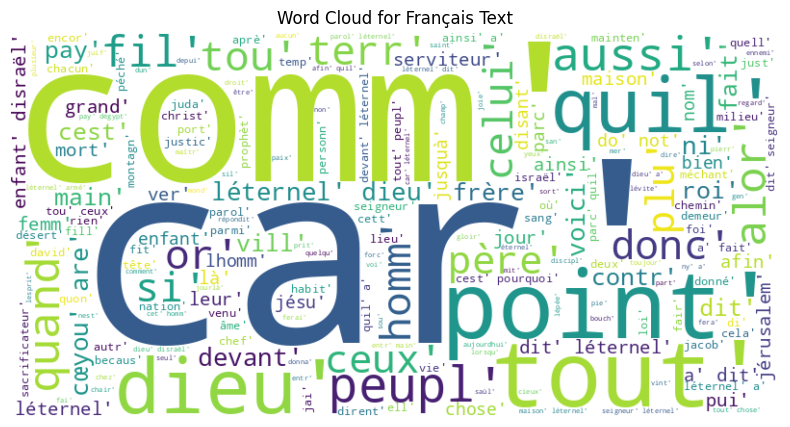

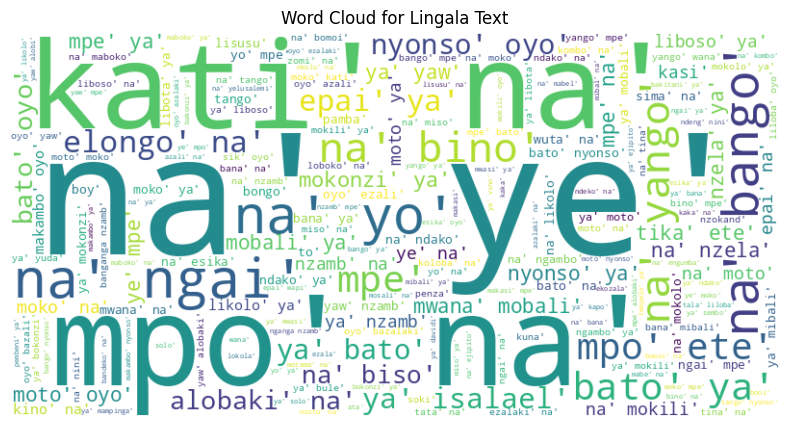

In [ ]:
# Function to preprocess text and generate word cloud
def generate_wordcloud(text_list, language):
    # Join the list of words into a single string
    text_str = ' '.join(map(str, text_list))

    # Generate word cloud without specifying font path
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_str)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {language} Text")
    plt.axis('off')
    plt.show()

# Generate word clouds for English and Hindi columns
generate_wordcloud(data['Français'], 'Français')
print("=====================================")
generate_wordcloud(data['Lingala'], 'Lingala')

In [ ]:
def calculate_max_sequence_length(text):
    # Concatenate x_train_seq and x_test_seq
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)

    return max_length_combined

max_length_combined_x = calculate_max_sequence_length(data['Français'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_x)
max_length_combined_y = calculate_max_sequence_length(data['Lingala'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_y)

Maximum sequence length in combined dataset x:  43
Maximum sequence length in combined dataset x:  104


# Tokenization on text data

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(data['Français'])

In [ ]:
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(data['Lingala'])

In [ ]:
# Add special tokens to the Hindi tokenizer
tok_hindi.word_index['<start>'] = len(tok_hindi.word_index) + 1
tok_hindi.word_index['<end>'] = len(tok_hindi.word_index) + 1

In [ ]:
len(tok.word_index), len(tok_hindi.word_index)

(20207, 14290)

In [ ]:
def add_special_tokens(sequences, start_token='<start>', end_token='<end>'):
    sequences_with_special_tokens = []
    for sequence in sequences:
        sequence_with_special_tokens = [start_token] + sequence + [end_token]
        sequences_with_special_tokens.append(sequence_with_special_tokens)
    return sequences_with_special_tokens

data['Lingala'] = add_special_tokens(data['Lingala'])

# Converting words to the number

In [ ]:
#Now we are goining to convert text to sequences.......
data['Français'] = tok.texts_to_sequences(data['Français'])
data['Lingala'] = tok_hindi.texts_to_sequences(data['Lingala'])

In [ ]:
def calculate_max_sequence_length(text):
    # Concatenate x_train_seq and x_test_seq
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)

    return max_length_combined

max_length_combined_x = calculate_max_sequence_length(data['Français'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_x)
max_length_combined_y = calculate_max_sequence_length(data['Lingala'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_y)

Maximum sequence length in combined dataset x:  43
Maximum sequence length in combined dataset x:  106


In [ ]:
data.sample(5)

,Français,Lingala
17441,"[129, 600, 4034, 16690, 6207, 92, 3, 419, 20, ...","[14289, 9, 36, 3, 76, 17, 21, 1, 21, 3863, 3, ..."
1060,"[36, 9, 1477, 5030, 1151, 24, 5082, 4334, 4661...","[14289, 78, 147, 2, 1426, 3, 21, 2, 1984, 3, 1..."
30919,"[252, 338, 507, 36, 266, 83, 43, 84, 338, 72, ...","[14289, 25, 104, 2, 43, 943, 3, 3449, 71, 62, ..."
22691,"[1877, 81, 13, 785, 11518, 85, 398, 892, 24, 4...","[14289, 344, 1398, 16, 1, 126, 93, 3, 1376, 53..."
30535,"[282, 651, 1691, 2886, 20073, 911, 4774, 147]","[14289, 44, 25, 30, 2, 931, 236, 683, 3, 1150,..."


# Train Test Split

In [ ]:
english = data['Français']
hindi = data['Lingala']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(english,hindi,test_size = 0.2, random_state = 42)

In [ ]:
print("Training set shape: ",x_train.shape,y_train.shape)
print("Testing set shape: ",x_test.shape,y_test.shape)

Training set shape:  (24878,) (24878,)
Testing set shape:  (6220,) (6220,)


# Sample Representation Of Words How Words Get Converted Into Numbers

In [ ]:
for num in x_train[24878]:
    print(num,end = " ")

7 270 4975 945 275 28 18 8271 18582 

In [ ]:
#Corresponding words .........
for num in x_train[24878]:
    word = tok.index_word.get(num)
    print(word,end = " ")

car plusieur rendaient faux témoignag contr leur déposit saccordai 

In [ ]:
#Corresponding words .........
for num in y_train[24878]:
    word = tok_hindi.index_word.get(num)
    print(word,end = " ")


None pamba bato mingi bazalaki kokosela ye makambo , kasi matatoli na bango ezalaki kokokana . None 

# Padding of the data

In [ ]:
x_train_main = pad_sequences(x_train, maxlen=max_length_combined_x, padding='post')
y_train_main = pad_sequences(y_train, maxlen=max_length_combined_y, padding='post')

In [ ]:
x_test_main = pad_sequences(x_test, maxlen=max_length_combined_x, padding='post')
y_test_main = pad_sequences(y_test, maxlen=max_length_combined_y, padding='post')

In [ ]:
print("shape of x_train_main is :",x_train_main.shape)
print("shape of y_train_main is :",y_train_main.shape)
print("shape of x_test_main is :",x_test_main.shape)
print("shape of y_test_main is :",y_test_main.shape)

shape of x_train_main is : (24878, 43)
shape of y_train_main is : (24878, 106)
shape of x_test_main is : (6220, 43)
shape of y_test_main is : (6220, 106)


In [ ]:
x_train_main

array([[ 839,   80,  637, ...,    0,    0,    0],
       [   7,   29, 2477, ...,    0,    0,    0],
       [ 463,  133,   19, ...,    0,    0,    0],
       ...,
       [   7,  298,  342, ...,    0,    0,    0],
       [ 230,  619,   22, ...,    0,    0,    0],
       [ 172, 1094,   79, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_test_main

array([[14289,    23,     3, ...,     0,     0,     0],
       [14289,     5,  1545, ...,     0,     0,     0],
       [14289,    83,     1, ...,     0,     0,     0],
       ...,
       [14289,    78,     6, ...,     0,     0,     0],
       [14289,    25,    55, ...,     0,     0,     0],
       [14289,   116,   139, ...,     0,     0,     0]], dtype=int32)

# LSTM || ENCODER-DECODER MODEL || RNN

<!-- https://www.kaggle.com/code/endofnight17j03/lstm-encoder-decoder-english-hindi?scriptVersionId=165921166&cellId=76 -->

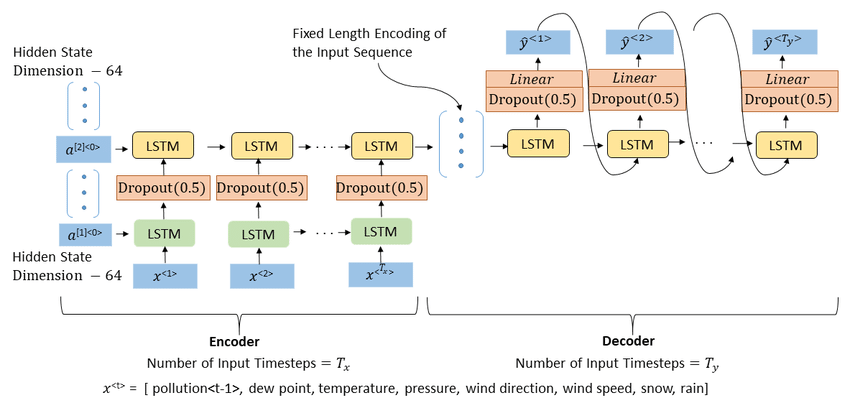

In [ ]:
def create_model(vocab_size_input, vocab_size_output, max_seq_length_input, max_seq_length_output, embedding_dim, hidden_units):
    # Define encoder input layer
    encoder_inputs = Input(shape=(max_seq_length_input,))

    # Define encoder embedding layer
    encoder_embedding = Embedding(input_dim=vocab_size_input, output_dim=embedding_dim)(encoder_inputs)

    # Define encoder LSTM layer
    encoder_lstm = LSTM(hidden_units, return_state=True)
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

    # Discard encoder outputs and keep only the states
    encoder_states = [state_h, state_c]

    # Define decoder input layer
    decoder_inputs = Input(shape=(max_seq_length_output,))

    # Define decoder embedding layer
    decoder_embedding = Embedding(input_dim=vocab_size_output, output_dim=embedding_dim)(decoder_inputs)

    # Define decoder LSTM layer with initial state set to encoder states
    decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

    # Define decoder output layer
    decoder_dense = Dense(vocab_size_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    # Define the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    print(model.summary())
    return model

In [ ]:
vocab_size_input = len(tok.word_index) + 1  # Add 1 for padding token
#max_seq_length_input = max(len(str(sentence)) for sentence in data['English'])

vocab_size_output = len(tok_hindi.word_index) + 1  # Add 1 for padding token
#max_seq_length_output = max(len(str(sentence)) for sentence in data['Hindi'])

print("Vocabulary size for French:", vocab_size_input)
#print("Maximum sequence length for English:", max_seq_length_input)
print("Vocabulary size for Lingala:", vocab_size_output)
#print("Maximum sequence length for Hindi:", max_seq_length_output)

Vocabulary size for French: 20208
Vocabulary size for Lingala: 14291


In [ ]:
def calculate_max_sequence_length(text):
    # Concatenate x_train_seq and x_test_seq
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)

    return max_length_combined

max_seq_length_input = calculate_max_sequence_length(data['Français'])
print("Maximum sequence length in combined french dataset: ", max_seq_length_input)
max_seq_length_output = calculate_max_sequence_length(data['Lingala']) - 1
print("Maximum sequence length in combined lingala dataset: ", max_seq_length_output)

Maximum sequence length in combined french dataset:  43
Maximum sequence length in combined lingala dataset:  105


In [ ]:
embedding_dim = 100
hidden_units = 256
batch_size = 64


model = create_model(vocab_size_input, vocab_size_output, max_seq_length_input, max_seq_length_output, embedding_dim, hidden_units)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 43)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 105)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 43, 100)              2020800   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 105, 100)             1429100   ['input_2[0][0]']             
                                                                                              

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),  # Stop training if validation loss stops improving for 3 epochs
    ModelCheckpoint(filepath='model_weights.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')  # Save the model with the best validation loss
]

# Fit the model with callbacks
history = model.fit(x=[x_train_main, y_train_main[:, :-1]],  # Exclude last token from decoder input
                    y=y_train_main[:, 1:],  # Exclude first token from decoder target
                    batch_size=batch_size,
                    epochs=6,
                    validation_data=([x_test_main, y_test_main[:, :-1]], y_test_main[:, 1:]),
                    callbacks=callbacks)

Epoch 1/6
389/389 [==============================] - 79s 189ms/step - loss: 1.9641 - accuracy: 0.7365 - val_loss: 1.4987 - val_accuracy: 0.7535
Epoch 2/6
389/389 [==============================] - 55s 141ms/step - loss: 1.4370 - accuracy: 0.7630 - val_loss: 1.3891 - val_accuracy: 0.7727
Epoch 3/6
389/389 [==============================] - 53s 137ms/step - loss: 1.3349 - accuracy: 0.7794 - val_loss: 1.3087 - val_accuracy: 0.7824
Epoch 4/6
389/389 [==============================] - 48s 124ms/step - loss: 1.2639 - accuracy: 0.7858 - val_loss: 1.2507 - val_accuracy: 0.7869
Epoch 5/6
389/389 [==============================] - 52s 134ms/step - loss: 1.2068 - accuracy: 0.7907 - val_loss: 1.2048 - val_accuracy: 0.7911
Epoch 6/6
389/389 [==============================] - 55s 140ms/step - loss: 1.1540 - accuracy: 0.7954 - val_loss: 1.1674 - val_accuracy: 0.7939


In [ ]:
weights_file_path = '/content/drive/MyDrive/model_weights_main.weights.h5'

model.save_weights(weights_file_path)

print("Model weights saved successfully.")

Model weights saved successfully.


# Model Training Graph

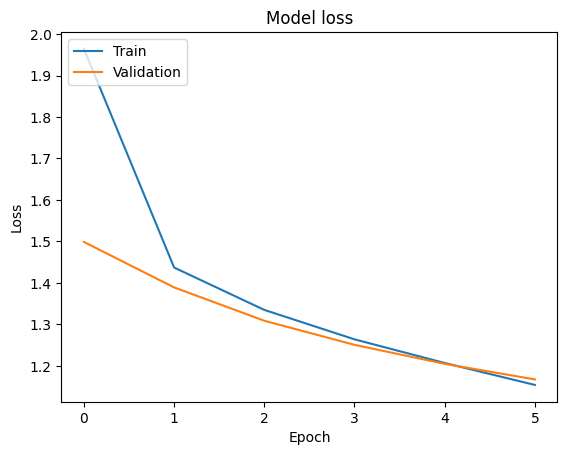

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

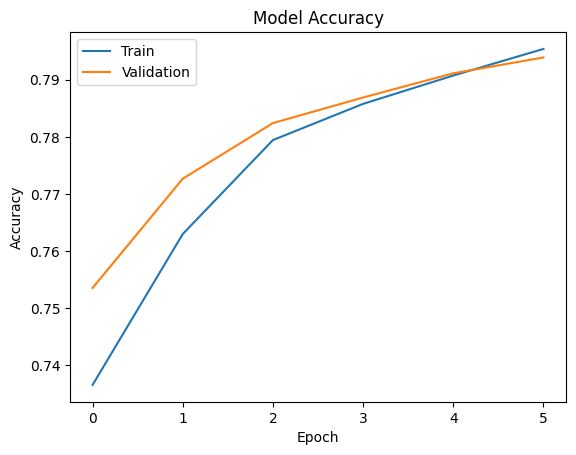

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Prédiction

In [ ]:
model = create_model(vocab_size_input, vocab_size_output, max_seq_length_input, max_seq_length_output, embedding_dim, hidden_units)
# Load the saved weights into the model
model.load_weights('/content/model_weights.weights.h5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 43)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 105)]                0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 43, 100)              2020800   ['input_3[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 105, 100)             1429100   ['input_4[0][0]']             
                                                                                            

In [ ]:
# Perform prediction for the first 200 rows one sample at a time
num_samples = min(100,len(x_test_main)) # Limit to the first 200 rows
predictions = []

for i in range(num_samples):
    single_x_test = x_test_main[i:i+1]
    single_y_test = y_test_main[i:i+1, :-1]  # Exclude last token
    single_prediction = model.predict([single_x_test, single_y_test])
    predictions.append(single_prediction)

# Concatenate predictions
predictions = np.concatenate(predictions, axis=0)

1/1 [==============================] - 0s 22ms/step


In [ ]:
num_samples

100

In [ ]:
def decode_prediction(prediction, tokenizer):
    # Get the index of the token with the highest probability for each time step
    token_indices = np.argmax(prediction, axis=-1)
    # Convert token indices to words using the tokenizer, handling out-of-vocabulary indices
    words = [tokenizer.index_word.get(index, '<UNK>') for index in token_indices if index != 0]  # Exclude padding token
    # Join the words into a single sentence
    sentence = ' '.join(words)
    return sentence

# Decode each prediction and print the corresponding Hindi sentences
for i, prediction in enumerate(predictions):
    decoded_sentence = decode_prediction(prediction,tok_hindi)
    print(f"Predicted Lingala sentence {i+1}: {decoded_sentence}")

Predicted Lingala sentence 1: pamba na nzamb ya bato ya ye , , na bino , mpe ya bato ya yo , na na bino na <UNK>
Predicted Lingala sentence 2: tango alobaki ete bato tala na nini , mwana na nzela , mpe mobali ya isalael , mwana oyo bato , mwana nzela ya , mpe azali yango , , , miso ya , na na mokili , <UNK> wana na na ye , ye , mpe , na , na ye , ye na ye . <UNK> ezali ngai . nzela . <UNK> <UNK>
Predicted Lingala sentence 3: tango na ye ya , , mpe moko ye na , , « ezali moko ezali na nzela ya bato , , na na yango , , mpe moko na ezali oyo , na , mpe na yango bule , <UNK> oyo , na na ye . na bato na . <UNK>
Predicted Lingala sentence 4: kasi mokolo ya isalael , mpe ya isalael , bazalaki na mokili , mpe , na bango : —
Predicted Lingala sentence 5: bongo alobaki ye : ya : —
Predicted Lingala sentence 6: tango , mwana , na moto , , yango na na ya <UNK> yaw , mwana , na nzela . yango . . na libela mokili nyonso . <UNK>
Predicted Lingala sentence 7: kasi , mpe mpe mpe mpe mpe
Predicted Linga

In [ ]:
# from nltk.translate.bleu_score import corpus_bleu
# # Convert numpy arrays to lists
# filtered_predictions_lists = [pred.tolist() for pred in filtered_predictions_lists]

# # Compute BLEU score
# bleu_score = corpus_bleu([[ref] for ref in reference_translations[:len(filtered_predictions_lists)]],decoded_sentence)
# print("BLEU Score:", bleu_score)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
reference_sentences = [[str(sentence).split()] for sentence in y_test_main[:num_samples]]
predicted_sentences_tokenized = [str(sentence).split() for sentence in decoded_sentence]
bleu_scores = [sentence_bleu(reference, hypothesis) for reference, hypothesis in zip(reference_sentences, predicted_sentences_tokenized)]
average_bleu_score = sum(bleu_scores) / len(bleu_scores)
#print('BLEU Scores:', bleu_scores)
print('Average BLEU Score:', average_bleu_score)

Average BLEU Score: 0.0
